In [1]:
from pyportfolio import PyPortfolio
import matplotlib.pyplot as plt

/Users/paopao_ch/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
stock_tickers = [  # Some random tickers to demonstrate the class usage
    "D05.SI",
    "O39.SI",
    "Z74.SI",
    "G07.SI",
    "C07.SI",
    "S58.SI",
    "C09.SI",
    "K71U.SI",
    "HMN.SI",
    "E5H.SI",
    "NS8U.SI",
]
portfolio = PyPortfolio(stock_tickers)

/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.content)
/Users/paopao_ch/Documents/projects/Portfolio/optimal-portfolio/pyportfolio.py:25: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_rf = pd.read_html(table_html)[0]
[*********************100%************

In [3]:
portfolio.info.head(38)

,Ticker,Company,Sector,Market Cap (B SGD),10-Y Return(%)
0,D05.SI,DBS Group Holdings Ltd,Financial Services,110.922629,193.501155
1,O39.SI,Oversea-Chinese Banking Corporation Limited,Financial Services,67.953623,98.344944
2,Z74.SI,Singapore Telecommunications Limited,Communication Services,52.347478,4.596100
3,G07.SI,Great Eastern Holdings Limited,Financial Services,12.211630,23.720415
4,C07.SI,Jardine Cycle & Carriage Limited,Industrials,10.750420,16.059908
5,S58.SI,SATS Ltd.,Industrials,5.486797,12.907544
6,C09.SI,City Developments Limited,Real Estate,4.663558,-18.904424
7,K71U.SI,Keppel REIT,Real Estate,3.582864,32.140237
8,HMN.SI,CapitaLand Ascott Trust,Real Estate,3.582977,50.533100
9,E5H.SI,Golden Agri-Resources Ltd,Consumer Defensive,3.614285,-38.020212


In [4]:
portfolio.data.head()

Ticker,C07.SI,C09.SI,D05.SI,E5H.SI,G07.SI,HMN.SI,K71U.SI,NS8U.SI,O39.SI,S58.SI,Z74.SI
Date,,,,,,,,,,,
2014-01-02 00:00:00+00:00,24.551661,8.091948,9.883744,0.409968,13.679792,0.618760,0.659174,0.187552,6.164504,2.424310,2.361465
2014-01-03 00:00:00+00:00,24.259212,7.947449,9.814384,0.406241,13.533935,0.616203,0.659174,0.187552,6.067613,2.409253,2.322752
2014-01-06 00:00:00+00:00,24.334021,7.938950,9.837506,0.413695,13.587676,0.616203,0.656381,0.184773,5.976784,2.394195,2.284039
2014-01-07 00:00:00+00:00,24.599262,7.904949,9.849064,0.406241,13.556966,0.623874,0.650794,0.184773,5.904115,2.386665,2.284039
2014-01-08 00:00:00+00:00,24.823698,8.057951,10.039805,0.406241,13.541612,0.621317,0.656381,0.188941,5.910170,2.424310,2.290492


In [5]:
results, weights = portfolio.run_monte_carlo_simulation(num_portfolios=100000)

100%|██████████| 100000/100000 [00:03<00:00, 31966.79it/s]


In [6]:
min_vol_weights, min_vol_returns, min_vol_std = portfolio.get_lowest_vol_port()
min_vol_weights

array([ 0.00276361, -0.04283321,  0.01283924,  0.01148345,  0.42435174,
        0.06153175,  0.14597361,  0.00541549,  0.13991144,  0.04410167,
        0.1944612 ])

In [7]:
optimal_weights, optimal_returns, optimal_std = portfolio.get_optimise_port()
optimal_weights

array([ 0.03299349, -1.72267654,  4.50462129, -0.308018  , -0.95826524,
        0.81193319,  0.29603002, -0.2861656 ,  0.52430925, -0.11149137,
       -1.78327048])

In [8]:
diverse_weights, diverse_returns, diverse_std = portfolio.get_risk_free_port()
diverse_weights

array([ 0.02969414, -1.55040888,  4.05415916, -0.2772162 , -0.86243872,
        0.73073987,  0.26642701, -0.25754904,  0.47187833, -0.10034223,
       -1.60494344,  0.1       ])

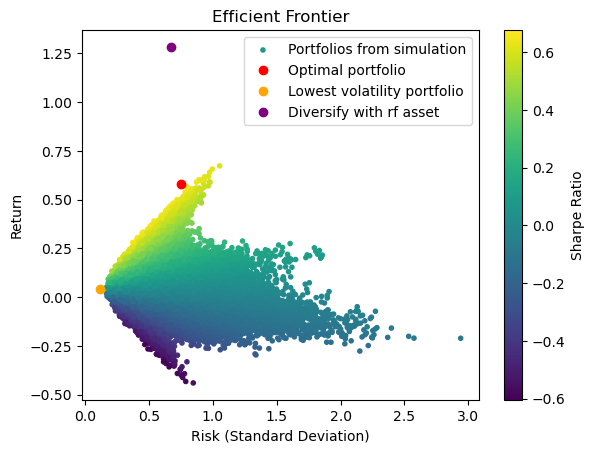

In [9]:
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='.', label="Portfolios from simulation")
plt.plot(optimal_std, optimal_returns, 'o', markersize=6, color="red", label="Optimal portfolio")
plt.plot(min_vol_std, min_vol_returns, 'o', markersize=6, color="orange", label="Lowest volatility portfolio")
plt.plot(diverse_std, diverse_returns, 'o', markersize=6, color="purple", label="Diversify with rf asset")
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.legend()
plt.show()